<a href="https://colab.research.google.com/github/v1qez1/PythonLab/blob/main/_lab_work_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа

In [ ]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Задание 1. Парсинг - 10 баллов

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

paramsch = {
    'text': "Переводчик китайского языка",
    'area': 1,
}

paramssp = {
    'text': "Переводчик испанского языка",
    'area': 1,
}

paramsfr = {
    'text': "Переводчик французского языка",
    'area': 1,
}

paramsit = {
    'text': "Переводчик итальянского языка",
    'area': 1,
}

paramsen = {
    'text': "Переводчик английского языка",
    'area': 1,
}

datach = requests.get(URL, paramsch).json()
datasp = requests.get(URL, paramssp).json()
datafr = requests.get(URL, paramsfr).json()
datait = requests.get(URL, paramsit).json()
dataen = requests.get(URL, paramsen).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
datach.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [ ]:
print(datach['items'])
print(datasp['items'])
print(datait['items'])
print(datafr['items'])
print(dataen['items'])

[{'id': '80291991', 'premium': False, 'name': 'Переводчик с китайского языка', 'department': None, 'has_test': False, 'response_letter_required': False, 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}, 'salary': None, 'type': {'id': 'anonymous', 'name': 'Анонимная'}, 'address': None, 'response_url': None, 'sort_point_distance': None, 'published_at': '2023-05-11T11:45:00+0300', 'created_at': '2023-05-11T11:45:00+0300', 'archived': False, 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=80291991', 'insider_interview': None, 'url': 'https://api.hh.ru/vacancies/80291991?host=hh.ru', 'adv_response_url': None, 'alternate_url': 'https://hh.ru/vacancy/80291991', 'relations': [], 'employer': {'name': 'Крупный российский бизнес', 'trusted': True}, 'snippet': {'requirement': 'Высшее образование. Свободное владение китайским языком (устно и письменно). Опыт работы в сфере перевода. Правила ведения деловой переписки. ', 'responsibility': 'Обеспечи

(1 балл) Посчитайте сколько всего найдено вакансий:

In [ ]:
count = datach['found'] +datasp['found'] +datait['found'] + datafr['found'] + dataen['found']
count

96

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
class Company:
    def __init__(self, name, x, y) -> None:
        self.name = name
        self.x = x
        self.y = y

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
companies = []
def add(data):
  for i in range(len(data['items'])):
    if data['items'][i]['address'] != None:
      x = Company(data['items'][i]['employer']['name'], data['items'][i]['address']['lat'], data['items'][i]['address']['lng'])
      companies.append(x)

add(datach)
add(datafr)
add(datait)
add(dataen)
add(datasp)

for i in range(len(companies)):
  print(companies[i].name, companies[i].x, companies[i].y)


Фаворит, Международный кадровый центр 55.77152 37.651502
NEOTECH 55.793414 37.698538
СюйГун Ру 55.657352 37.368038
ЛАНИТ None None
CNC ELECTRIC 55.839855 37.490272
Национальный туристический офис Китая в г.Москва 55.679433 37.566952
Wayz Intelligent Manufacturing Technology Co.Ltd 55.692328 37.663009
Лаиска 55.633028 37.441404
Золотая Гора 19.91118049621582 99.8348617553711
ЛИКСИ 55.691521 37.43322
СК-ОБЬ 55.868425 37.404627
СДС 55.852733 37.390218
RT 0.0 0.0
Международная медиагруппа Россия сегодня (МИА Россия сегодня) 55.737355 37.590488
RT 0.0 0.0
Международная медиагруппа Россия сегодня (МИА Россия сегодня) 55.737355 37.590488
Золотая Гора 19.91118049621582 99.8348617553711
КНГК-ИНПЗ 55.786753 37.250835
Русатом Сервис 55.683787 37.554169
Холдинговая Компания Дальснаб 43.276584 132.064761
КНГК-ИНПЗ 55.723247 37.564105
АНО Творческая Студия Джесс 55.757729 37.518371
НАМИ, ФГУП 55.848352 37.544108
Финвал, Группа Компаний 55.703855 37.690228
RT 0.0 0.0
Агентство переводов Эдельвейс 55.

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
len(companies)

30

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
neededcompanies = []
for item in companies:
  if item.x != None and item.y != None and item.y >= 36 and item.y <= 39 and item.x >= 53 and item.x <= 56:
    neededcompanies.append(item)


(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

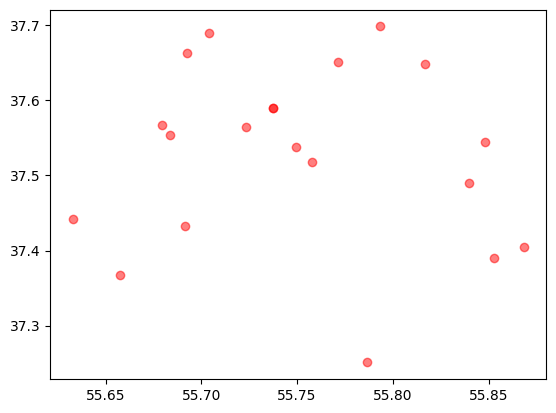

In [ ]:
x = [item.x for item in neededcompanies]
y = [item.y for item in neededcompanies]
names = [item.name for item in neededcompanies]
plt.plot(x, y, 'ro', alpha = 0.5)
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

In [ ]:
dataxy = {
  "lat": x,
  "lon": y,
  "name": names
}

pointss = pd.DataFrame(dataxy)
fig = px.scatter_mapbox(
    pointss,
    lat= "lat",
    lon= "lon",
    hover_name = "name",
    zoom=10,
    height=500,
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

Переводчики требуются наиболее всего именно в определённых районах. Скорее всего это из-за того, что в этих районах чаще происходит взаимодействие с иностранными компаниями.

## Задание 2. Анализ данных - 20 баллов



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [ ]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

Downloading...
From: https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 224MB/s]


Создадим DataFrame:

In [ ]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [ ]:
diamonds[:5]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [ ]:
len(diamonds)

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
print(np.argmin(diamonds['total_sales_price']), min(diamonds['total_sales_price']))
print(np.argmax(diamonds['total_sales_price']), max(diamonds['total_sales_price']))

0 200
219702 1449881


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
countbad = 0
for valueall in diamonds.values:
  for value in valueall:
    if value == 'None' or value == 'unknown':
      countbad += 1
countbad

1891168

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
resultcolumns = set()

for column in diamonds.items():
  for z in diamonds[column[0]]:
    if z == 'None' or z == 'unknown':
      resultcolumns.add(column[0])
resultcolumns

{'color',
 'culet_condition',
 'culet_size',
 'cut_quality',
 'eye_clean',
 'fancy_color_dominant_color',
 'fancy_color_intensity',
 'fancy_color_overtone',
 'fancy_color_secondary_color',
 'fluor_color',
 'fluor_intensity',
 'girdle_max',
 'girdle_min'}

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [ ]:
countTask1 = 0

colsNonInf = []

for column in resultcolumns:
  if column.startswith('fancy_color_') or column.startswith('fluor_'):
    countTask1 += 1
    colsNonInf.append(column)
countTask1

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [ ]:
countTask2 = 0

for column in colsNonInf:
  for value in diamonds[column]:
    if value != 'None' and value != 'unknown':
      countTask2 += 1

countTask2

111586

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:
diamonds.drop(columns = colsNonInf, axis = 1, inplace=True)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [ ]:
colsculet = []

for column in diamonds.items():
  if column[0].startswith('culet_'):
    colsculet.append(column[0])

diamonds.drop(columns = colsculet, axis = 1, inplace=True)

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
sum(diamonds['total_sales_price'])

1517721991

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
diamonds[::2]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [ ]:
diamonds[::6]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
diamonds[['cut', 'lab']]

,cut,lab
0,Round,IGI
1,Round,IGI
2,Round,IGI
3,Round,IGI
4,Round,IGI
...,...,...
219698,Round,GIA
219699,Radiant,GIA
219700,Round,GIA
219701,Princess,GIA


(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
# your code here

### Построение графиков

(2 балла) Постройте график `цвет бриллианта - стоимость`:

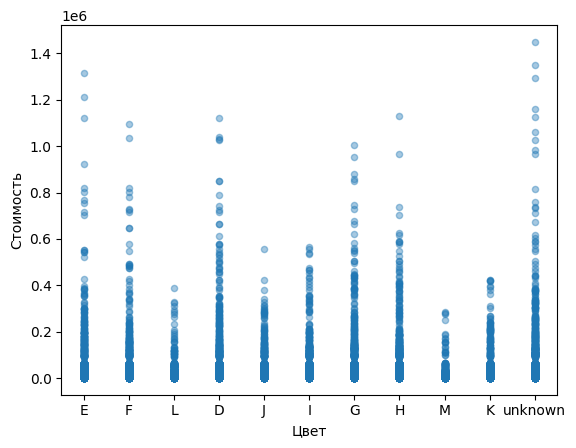

In [ ]:
neededcolumns = diamonds[['color', 'total_sales_price']]
color_price_named = neededcolumns.set_axis(['Цвет','Стоимость'], axis='columns')
graph = color_price_named.plot.scatter(x='Цвет', y='Стоимость', alpha=0.4)

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

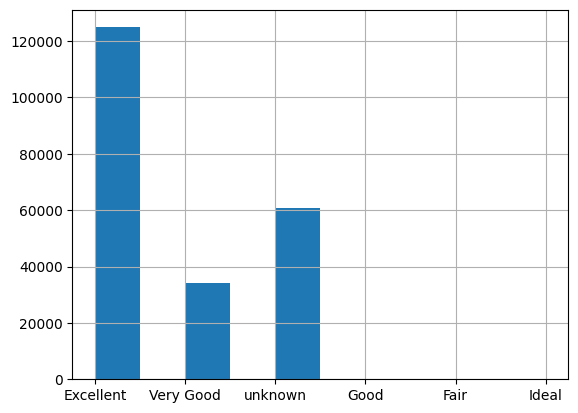

In [ ]:
labs = diamonds['lab']
graphic = table.hist()

(2 балла) Постройте график `вес бриллианта - стоимость`:

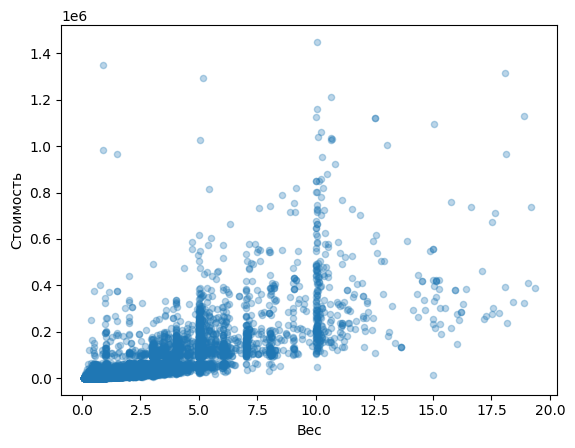

In [ ]:
weight_price = diamonds[['carat_weight', 'total_sales_price']]
weight_price_named = weight_price.set_axis(['Вес','Стоимость'], axis='columns')
graphic2 = weight_price_named.plot.scatter(x='Вес', y='Стоимость', alpha=0.3)

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

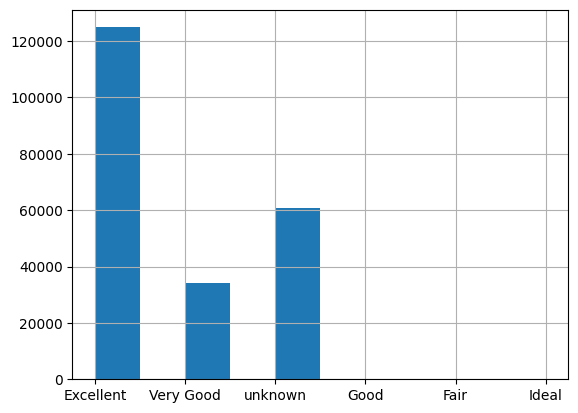

In [ ]:
table2 = diamonds['cut_quality']
graphic3 = table2.hist()

(2 балла) **Сделайте выводы по построенным графикам:**

Большая часть бриллиантов имееет GIA Cut Excellent, цена бриллианта частично зависит от его веса. Большинство бриллиантов из GIA оценки

## Задание 3. Модель - 30 баллов

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [ ]:
dataset = diamonds[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]

(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [ ]:
dataset = dataset.sample(frac=1).reset_index(drop=True)

(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [ ]:
sum_mink1 = list()
for i in range(dataset.count()[0]):
  a = dataset['meas_length'][i]
  b = dataset['meas_width'][i]
  c = dataset['meas_depth'][i]
  sumcur = (abs(a - b) ** 3 + abs(a - c) ** 3 + abs(b - c) ** 3) ** (1/3)
  sum_mink1.append(sumcur)
dataset['mink'] = sum_mink1

(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [ ]:
newdataset = dataset[['mink', 'total_sales_price']]

(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [ ]:
test = newdataset.iloc[:newdataset.count()[0]//5]
train = newdataset.iloc[newdataset.count()[0]//5:]

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

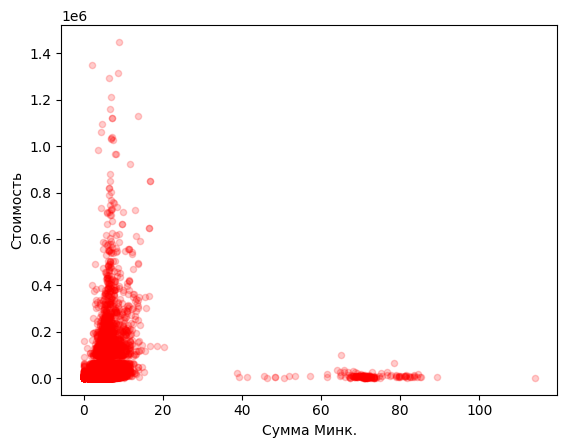

In [ ]:
train_named = train.set_axis(['Сумма Минк.','Стоимость'], axis='columns')
graph = train_named.plot.scatter(x='Сумма Минк.', y='Стоимость', alpha=0.2, color='red')

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

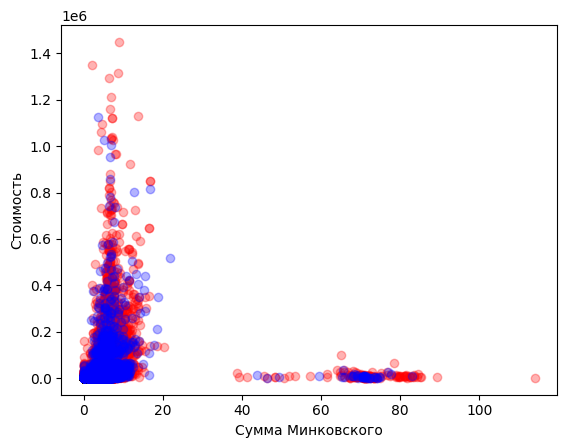

In [ ]:
plt.xlabel('Сумма Минковского')
plt.ylabel('Стоимость')
plt.scatter(x=train['mink'],y=train['total_sales_price'],c='red',alpha=0.3)
plt.scatter(x=test['mink'],y=test['total_sales_price'],c='blue',alpha=0.3)

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(test)
distances, indices = nbrs.kneighbors(train)
distances

array([[1.30674720e+01],
       [1.29401421e+03],
       [0.00000000e+00],
       ...,
       [7.39091361e-04],
       [4.07017100e-01],
       [1.69356527e+00]])

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
diff = []
for i in range(test.count()[0]):
  diff.append(distances[i][0] / test['total_sales_price'][i] * 100)
print(sum(diff) / test.count()[0])

0.8099293836417756


**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
from sklearn.preprocessing import OneHotEncoder
datalearn = diamonds[['cut', 'lab']]
Encoder = OneHotEncoder(handle_unknown='ignore')
Encoder.fit(datalearn)
datalearn = Encoder.transform(datalearn).toarray()

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datalearn, list(diamonds['total_sales_price']), train_size=1)

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
mean_squared_error(y_pred, y_test)

707119907.7635934

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

Категориальные признаки не очень хорошо описывают цену бриллианта. Готовые инструменты для работы гораздо удобнее написанных мной и работают значительно быстрее